## Часть 1. Приоритизация гипотез.

Для выполнения поставленной задачи необходимо применить фреймворки ICE и RICE.


In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Изучим файл с гипотезами и их оценкой по параметрам.

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')
pd.set_option('display.max_colwidth', 120)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Итак, в файле описаны 9 гипотез и дана оценка по четырем параметрам, необходимым для расчета ICE & RICE. Все оценки даны в числовом формате, так что можем приступить непосредственно к расчетам.

In [4]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


 По фреймворку ICE получаем, что наиболее приоритетными для нас являются гипотезы №9, 1 и 8.

In [5]:
hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


По фреймворку RICE приоритизация несколько изменилась: теперь тройку лидеров составляют гипотезы № 8, 3, 1 и 7. Причем 8-я гипотеза с большим отрывом опережает все остальные. Девятая гипотеза (лидер по фрейму ICE) теперь только на 5-ом месте, т.к. параметр охвата (Reach) у нее очень низкий. А гипотеза №3 была только на 5-ом месте по результатам ранжирования ICE, а теперь вышла на 2-ое, т.к. у нее параметр охвата имеет высокое значение (8).  

Исходя из результатов ICE & RICE наиболее целесообразным представляется в качестве первого приоритета для тестирования выбрать гипотезу №8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

## Часть 2. Анализ A/B-теста

Для начала изучим данные в файлах с результатами А/В теста и проведем предобработку, если необходимо.

In [6]:
orders = pd.read_csv('orders.csv')
display(orders.head())
orders.info()
orders.duplicated().sum()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


0

В данных нет пропусков и дубликатов. Формат даты неверный - необходимо преобразование.

In [7]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
display(orders['date'].min())
display(orders['date'].max())
orders.describe().style.format("{:.2f}")

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


На первый взгляд разброс по выручке с заказа имеет большие выбросы. Исследуем этот момент далее по ходу анализа.

In [8]:
double_users = orders.pivot_table(index = 'visitorId', columns = 'group', values = 'transactionId', 
                   aggfunc = 'count', margins = True)\
      .sort_values(by = 'All', ascending = False)\
      .query('A >= 1 and B >= 1')
display(double_users.head(10))
display(double_users.count())
double_users.sum()

group,A,B,All
visitorId,,,
All,557.0,640.0,1197
4256040402,7.0,4.0,11
2458001652,5.0,6.0,11
2378935119,4.0,5.0,9
2038680547,5.0,3.0,8
3062433592,1.0,4.0,5
3717692402,1.0,4.0,5
199603092,4.0,1.0,5
3803269165,1.0,4.0,5


group
A      59
B      59
All    59
dtype: int64

group
A       646.0
B       732.0
All    1378.0
dtype: float64

Получаем также, что 58 пользователей попали по результатам теста в обе группы одновременно, что ухудшает качество результатов теста. Количество этих пользователей составляет всего 5% от общего числа, но количество заказов, которое они сделали (1378 - 1197) = 181. Если мы удалим все эти строки из таблицы заказов, то потеряем 15% данных. Поэтому кажется целесообразным оставить их с оговоркой о возможной потере в качестве результатов теста.  

Изучим второй файл с данными о посетителях интернет-магазина.

In [9]:
visitors = pd.read_csv('visitors.csv')
display(visitors.head())
visitors.info()
visitors.duplicated().sum()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


0

В данных нет пропусков и дубликатов. Формат даты неверный - необходимо преобразование.

In [10]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
display(visitors['date'].min())
visitors['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Границы дат в файлах с заказами и посетителями сайта совпадают, значит можем их сравнивать без отсечения части данных.

In [11]:
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

In [12]:
visitors.groupby('group')['visitors'].mean()

group
A    604.387097
B    610.193548
Name: visitors, dtype: float64

Разбивка пользователей по группам равномерная (разница менее 1%), что является хорошим условием для качественного А/В теста.  
Перейдем к анализу результатов А/В теста.  

Построим следующие визуализации:  
* График кумулятивной выручки по группам,
* График кумулятивного среднего чека по группам,
* График относительного изменения кумулятивного среднего чека группы B к группе A,
* График кумулятивной конверсии по группам,
* График относительного изменения кумулятивной конверсии группы B к группе A.


In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [34]:
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах.

In [14]:
#Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, 
#а группа теста равна группе из datesGroups:
#orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]
#Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, 
#и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. 
#Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
                              .agg({'date' : 'max', 'group' : 'max', 
                                    'transactionId' : pd.Series.nunique, 
                                    'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
#Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group'
                              .sort_values(by=['date','group']))
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [15]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                                                                         visitors['group'] == x['group'])]\
                                .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                .sort_values(by=['date','group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [16]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


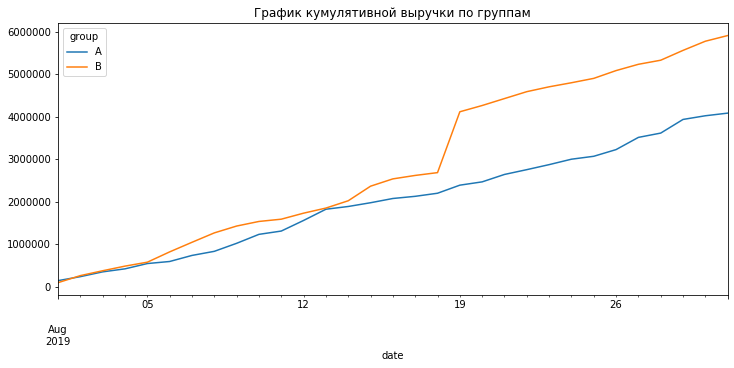

In [17]:
fig, ax = plt.subplots(figsize = (12,5))
cummulativeData.pivot_table(index = 'date', columns = 'group', values = 'revenue', aggfunc = 'sum')\
               .plot(kind = 'line', ax = ax)
plt.title('График кумулятивной выручки по группам')
plt.show()


На графике, начиная с 5 августа, кумулятивная выручка по группе В стабильно превышает выручку по группе А. Особенно разрыв увеличивается после 19 августа, когда произошло скачкообразное увеличение. Это свидетельство наличия выбросов (в данном случае, очень больших по стоимости заказов) в данной группе. В группе А график более плавный, есть лишь небольшой пик в районе 13 августа, когда выручка в этой группе кратковременно сравнялась с группой В.

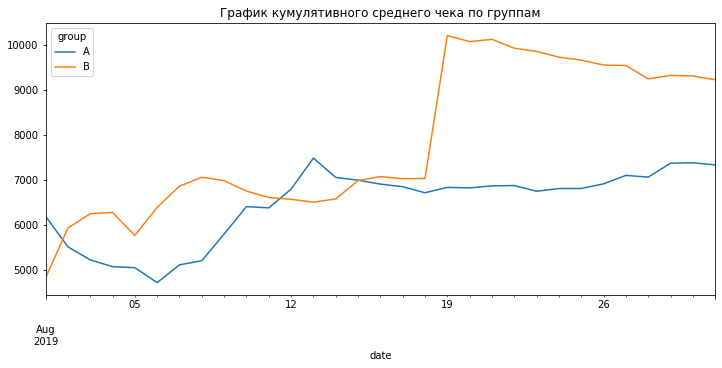

In [18]:
cummulativeData['ave_order_value'] = cummulativeData['revenue'] / cummulativeData['orders']
fig, ax = plt.subplots(figsize = (12,5))
cum_ave_order_value = cummulativeData.pivot_table(index = 'date', columns = 'group', \
                                        values = 'ave_order_value', aggfunc = 'sum')
cum_ave_order_value.plot(kind = 'line', ax = ax)
plt.title('График кумулятивного среднего чека по группам')
plt.show()

Графики средних чеков по группам пересекаются в нескольких местах до 19 августа, что говорит об отсутствии преобладающих различий в какой-либо группе пользователей. Но из-за выброса, произошедшего 19.08, кумулятивный средний чек по группе В существенно превысил группу А, и пересечений на протяжении рассматриваемого периода больше не наблюдается. Однако, есть тенденция к стабилизации чека по группе А и к снижению в группе В, поэтому есть вероятность, что в долгосрочной перспективе обе линии графика сравняются, однако имеющихся данных недостаточно, чтобы однозначно сделать такой вывод.

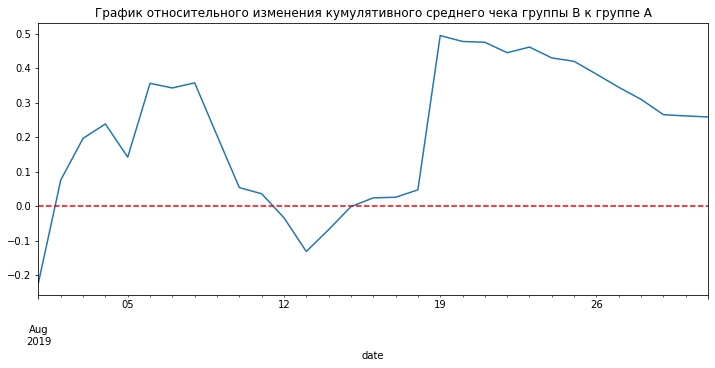

In [19]:
cum_ave_order_value['diff'] = cum_ave_order_value['B'] / cum_ave_order_value['A'] - 1
fig, ax = plt.subplots(figsize = (12,5))
cum_ave_order_value['diff'].plot(kind = 'line', ax = ax)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Данный график дублирует картину предыдущего: до выброса 19.08 нет однозначного преобладания одной группы над другой, после выброса группа В захватывает лидерство, но проявляется тенденция к постепенному снижению, что в рассматриваемом периоде не дает возможности сделать однозначных выводов на долгосрочную перспективу.  

Перейдем к расчету кумулятивной конверсии.

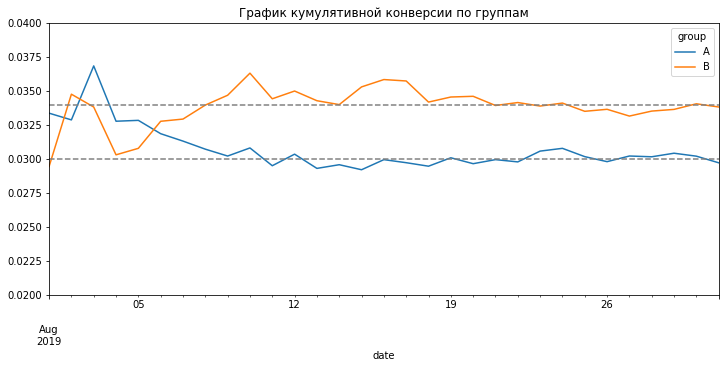

In [20]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
fig, ax = plt.subplots(figsize = (12,5))
cum_conversion = cummulativeData.pivot_table(index = 'date', columns = 'group',\
                                             values = 'conversion', aggfunc = 'sum')
cum_conversion.plot(kind = 'line', ax = ax)
ax.set_ylim(.02, .04)
plt.axhline(y=.0340, color='grey', linestyle='--')
plt.axhline(y=.0300, color='grey', linestyle='--')
plt.title('График кумулятивной конверсии по группам')
plt.show()

На данном графике, начиная с 6 августа, видно стабильное превышение конверсии в группе В над этим же параметром в контрольной группе. На большей части рассматриваемого периода конверсия в группе А колеблется в районе 3%, в то время, как в группе В она ближе к 3,4%, хотя все же наблюдается небольшая тенденция к ее снижению. Попробуем проявить это более отчетливо на графике относительной разницы конверсий.

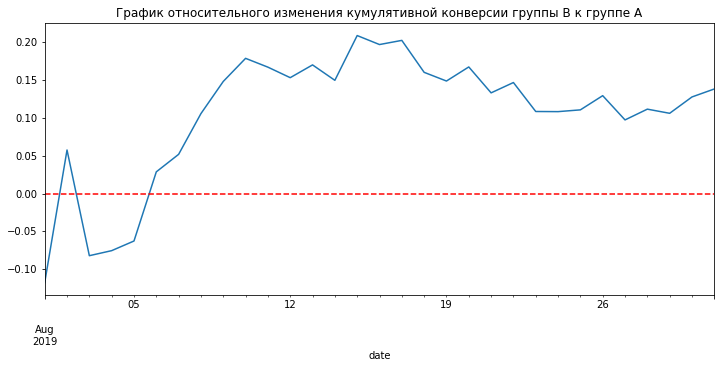

In [21]:
cum_conversion['diff'] = cum_conversion['B'] / cum_conversion['A'] - 1
fig, ax = plt.subplots(figsize = (12,5))
cum_conversion['diff'].plot(kind = 'line', ax = ax)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

Здесь также видим более высокую конверсию в группе В (график выше нуля), однако с некоторой тенденцией к уменьшению разницы между значениями этого параметра в группах.  

Поскольку ранее мы заметили выбросы в данных по заказам, имеет смысл их точно определить и провести очистку данных. Это поможет сделать более корректный анализ результатов теста.  


Далее проведем следующие вычисления:  
* Построим точечный график количества заказов по пользователям.
* Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
* Построим точечный график стоимостей заказов.
* Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.


In [22]:
orders_per_user = orders.groupby('visitorId', as_index=False)['transactionId'].count()
orders_per_user.sort_values(by = 'transactionId', ascending = False).head(10)

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Итак, у нас имеются пользователи, сделавшие 5 и более заказов за 1 месяц. Чтобы определить насколько обычна такая частота заказов среди пользователей нашего интернет-магазина, посмотрим на нее на графике. 

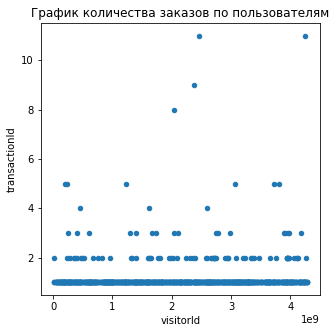

In [23]:
fig, ax = plt.subplots(figsize = (5,5))
orders_per_user.plot(kind = 'scatter', x = 'visitorId', y = 'transactionId', ax = ax)
plt.title('График количества заказов по пользователям')
plt.show()

Визуально кажется, что мало кто сделал больше 3-х заказов за рассматриваемый период. Чтобы точнее определить границу обычной частоты заказов, посчитаем перцентили.

In [24]:
np.percentile(orders_per_user['transactionId'], [95, 99])

array([2., 4.])

Не более 5% пользователей делали более 2 заказов и не более 1% - более 4. Можем установить максимум 3 заказа на пользователя как границу отсечки аномальной частоты заказов.  

Теперь посмотрим на разброс средней величины заказа. Из предварительного анализа мы уже знаем, что 75% заказов по величине среднего чека ниже 8300руб, и одновременно с этим максимальный заказ сделан на сумму 1294500руб. Т.е. есть большие выбросы. Зададим лимит по оси Y, чтобы точнее увидеть разброс большинства заказов.

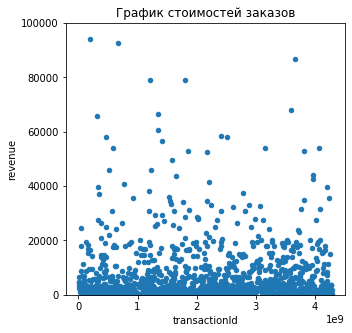

In [25]:
fig, ax = plt.subplots(figsize = (5,5))
orders.plot(kind = 'scatter', x = 'transactionId', y = 'revenue', ax = ax)
ax.set_ylim(0, 100000)
plt.title('График стоимостей заказов')
plt.show()

In [26]:
# также для большей точности определения границы обычной суммы чека посчитаем перцентили
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28000 и не более 1% - дороже 59000руб. Можем установить планку отсечки аномальных заказов на границе 40000.  

Теперь, определив значения выбросов, можем посчитать результаты теста по всем данным, а затем по данным, очищенным от выбросов, и сравнить полученные значения.  

Посчитаем статистическую значимость различий в конверсии и в среднем чеке заказа между группами по "сырым" и по очищенным данным.

In [27]:
# группируем заказы по пользователям и делим по группам
orders_by_users = orders.pivot_table(index = 'visitorId', columns = 'group', values = 'transactionId', 
                                       aggfunc = 'count')
orders_by_usersA = orders_by_users.query('A >= 1')['A']
orders_by_usersB = orders_by_users.query('B >= 1')['B']
# формируем выборки по группам из данных по пользователям с заказами плюс всех остальных 
# пользователей, попавших в группу, но не сделавших заказ
sample_A = pd.concat([orders_by_usersA,\
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='A'].sum().to_numpy() \
                                                  - len(orders_by_usersA)), \
                               name='orders')],axis=0)
sample_B = pd.concat([orders_by_usersB,\
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='B'].sum().to_numpy() \
                                                  - len(orders_by_usersB)), \
                               name='orders')],axis=0)
# считаем стат значимость различий в конверсии между группами
print("{0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print("{0:.3f}".format(sample_B.mean()/sample_A.mean()-1))

0.008
0.138


Получаем, что, по сырым данным, в наших группах имеются различия в конверсии. В группе В конверсия выше на 13,8%.  Посмотрим на различия в величине среднего чека:

In [28]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                          orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


Результаты по всем данным, включая выбросы, говорят нам, что с вероятностью 36,5% разница в средних чеках между группами отсутствует. Хотя относительное превышение средней суммы заказа в группе В над группой А составляет почти 26%. (возможно все дело в том большом выбросе от 19.08 - проверим на очищенных данных).  

Чтобы очистить данные, сначала составим список пользователей, совершивших очень дорогие покупки или очень большое их количество. В качестве границ отсечения возьмем определенные ранее параметры в 3 заказа и в 40000руб на один заказ.

In [29]:
usersWithManyOrders = orders_by_users.query('A > 3 or B > 3').reset_index()['visitorId']
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
0       199603092
1       237748145
684     358944393
648     382846391
Name: visitorId, dtype: int64
(34,)


Получили список из 34 пользователей. Уберем их по номеру ID из данных по заказам и пересчитаем результаты теста.

In [30]:
orders_by_usersA_filtered = orders_by_users.query('A >= 1 and visitorId not in @abnormalUsers')['A']
orders_by_usersB_filtered = orders_by_users.query('B >= 1 and visitorId not in @abnormalUsers')['B']
sample_A_filtered = pd.concat([orders_by_usersA_filtered,\
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='A'].sum().to_numpy() \
                                                  - len(orders_by_usersA)), \
                               name='orders')],axis=0)
sample_B_filtered = pd.concat([orders_by_usersB_filtered,\
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='B'].sum().to_numpy() \
                                                  - len(orders_by_usersB)), \
                               name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print("{0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

0.005
0.164


На очищенных данных результаты теста не изменились: различия в конверсии есть. Причем относительное превышение конверсии в группе В над группой А даже увеличилось и составило 16,4%.  
Посмотрим на результаты по среднему чеку:

In [31]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders.query('group == "A" and visitorId not in @abnormalUsers')['revenue'],
    orders.query('group == "B" and visitorId not in @abnormalUsers')['revenue'])[1]))

print("{0:.3f}".format(
    orders.query('group == "B" and visitorId not in @abnormalUsers')['revenue'].mean()/
    orders.query('group == "A" and visitorId not in @abnormalUsers')['revenue'].mean() - 1))

0.355
0.060


На очищенных данных результаты по среднему чеку также подтверждаются: разницы между группами нет с вероятностью 35,5%. При этом относительное превышение группы В над группой А существенно сократилось и составило всего 6%. Теперь это значение кажется гораздо более логичным на фоне результатов статистического теста.

Итак, по результатам А/В теста наиболее целесообразным, по моему мнению, выглядит вариант : остановить тест и зафиксировать победу группы В по результатам конверсии (3,4% vs 3%), а также относительное равенство внутри групп по результатам величины среднего чека.
Однако при этом хочу отметить 2 момента:
- качество результатов теста несколько скомпрометировано в связи с попаданием одних и тех же пользователей в разные группы
- на имеющихся данных у нас нет возможности оценить правильность размера выборки, взятой для теста. Этот параметр важен для исключения ошибки подглядывания, а также, согласно правилам процедуры А/В тестирования, позволяет принять решение об остановке теста, независимо от результатов (подтверждения или отвержения тестируемой гипотезы). Размер выборки можем определить при наличии целевого значения конверсии, которого мы хотели достичь в результате внедрения  тестируемых изменений.